<a href="https://colab.research.google.com/github/Rashimanish/-Insurance-Cross-Selling/blob/main/Overview%20%26%20EDA/IC_DATASET_OVERVIEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES AND LOADING DATA SET**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/INSURANCE/train.csv'

#Read dataset
df = pd.read_csv(file_path)

Mounted at /content/drive


# **DATA SET OVERVIEW**

In [ ]:
df.shape

(11504798, 12)

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [ ]:
df.isna().sum()/len(df)*100

,0
id,0.0
Gender,0.0
Age,0.0
Driving_License,0.0
Region_Code,0.0
Previously_Insured,0.0
Vehicle_Age,0.0
Vehicle_Damage,0.0
Annual_Premium,0.0
Policy_Sales_Channel,0.0


*There are no null values in any of variable.*

In [ ]:
df.duplicated().sum()

0

*There are no duplicate records in the datset.*

In [ ]:
# Get the summary statistics for numerical variables
df.describe()[1:].T.style.background_gradient(cmap='Reds', axis=1)

,mean,std,min,25%,50%,75%,max
id,5752398.500000,3321149.255474,0.000000,2876199.250000,5752398.500000,8628597.750000,11504797.000000
Age,38.383563,14.993459,20.000000,24.000000,36.000000,49.000000,85.000000
Driving_License,0.998022,0.044431,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,26.418690,12.991590,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,0.462997,0.498629,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,30461.370411,16454.745205,2630.000000,25277.000000,31824.000000,39451.000000,540165.000000
Policy_Sales_Channel,112.425442,54.035708,1.000000,29.000000,151.000000,152.000000,163.000000
Vintage,163.897744,79.979531,10.000000,99.000000,166.000000,232.000000,299.000000
Response,0.122997,0.328434,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
# Get the summary statistics for categorical variables
df.describe(include='object')


,Gender,Vehicle_Age,Vehicle_Damage
count,11504798,11504798,11504798
unique,2,3,2
top,Male,1-2 Year,Yes
freq,6228134,5982678,5783229


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,6228134
Female,5276664


In [ ]:
df['Vehicle_Age'].value_counts()

,count
Vehicle_Age,
1-2 Year,5982678
< 1 Year,5044145
> 2 Years,477975


In [ ]:
df['Vehicle_Damage'].value_counts()

,count
Vehicle_Damage,
Yes,5783229
No,5721569


# **EDA**

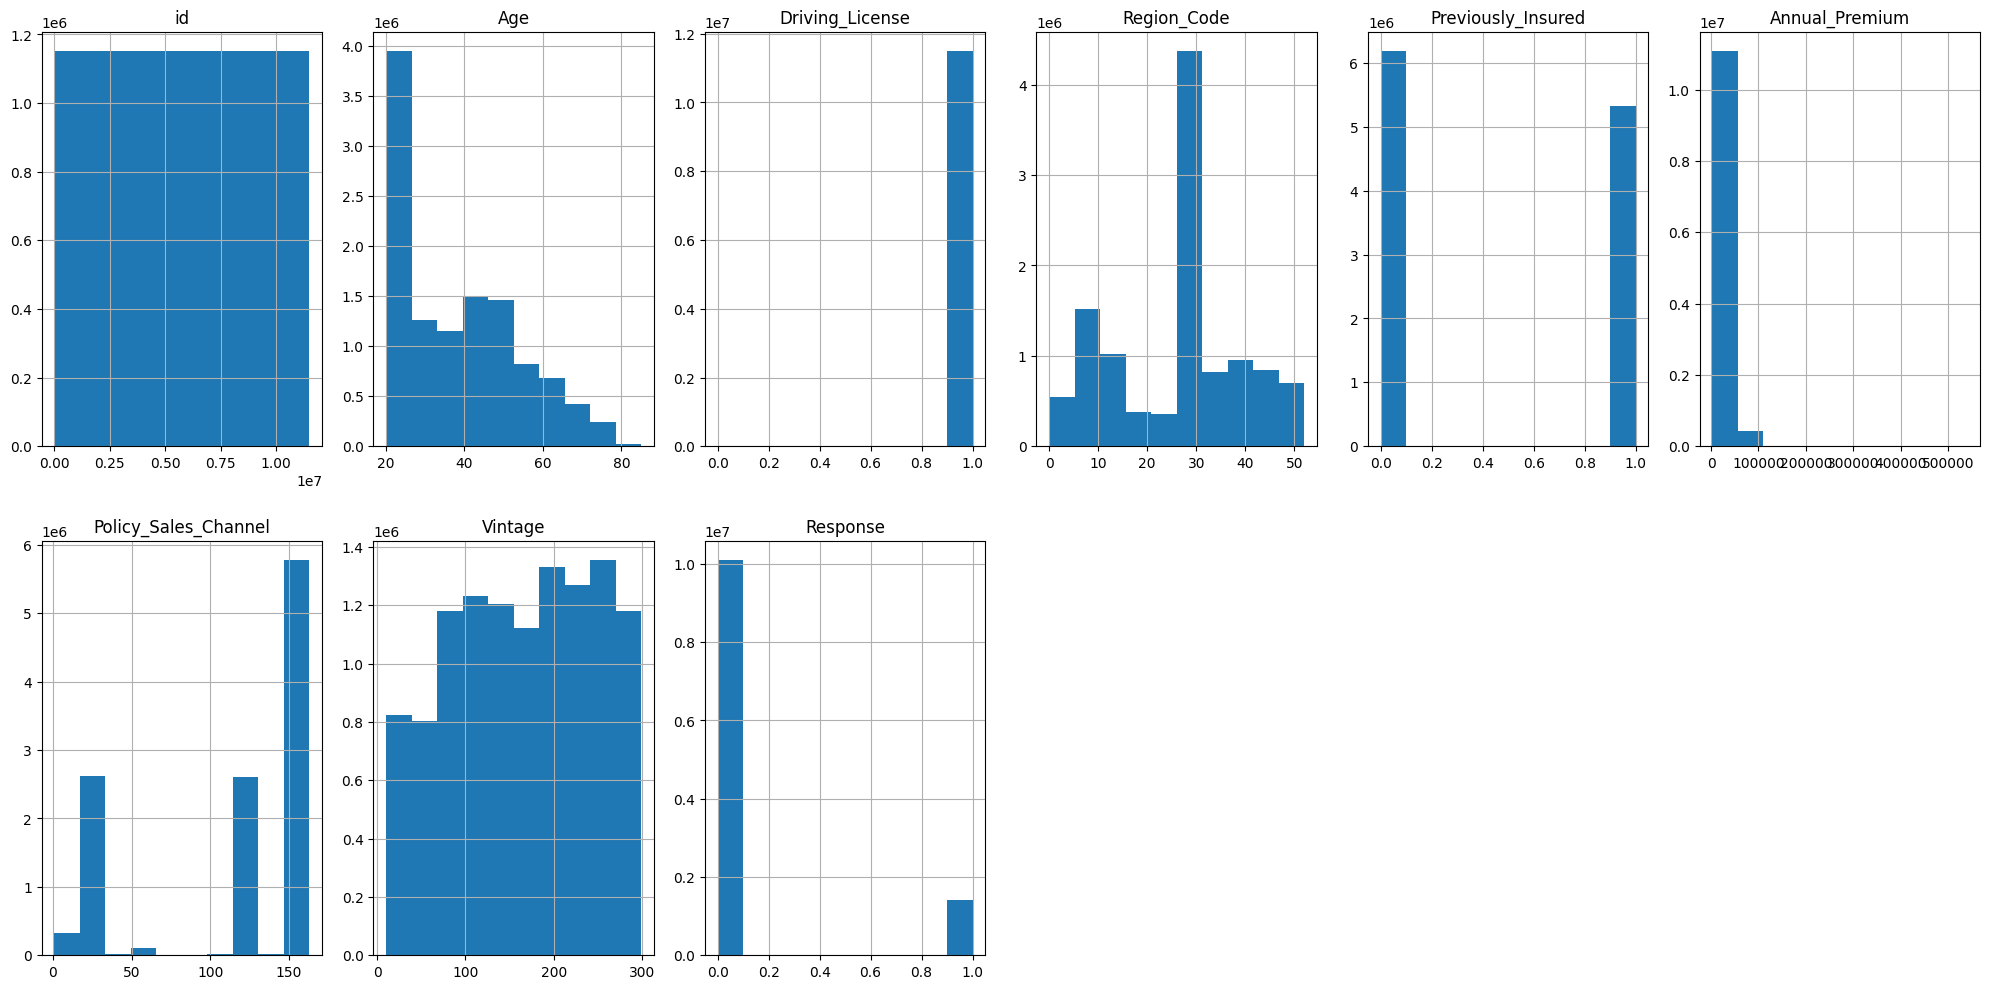

In [31]:
df.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

<ipython-input-36-2dd0932b98c0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Response', data=df, palette=colors)


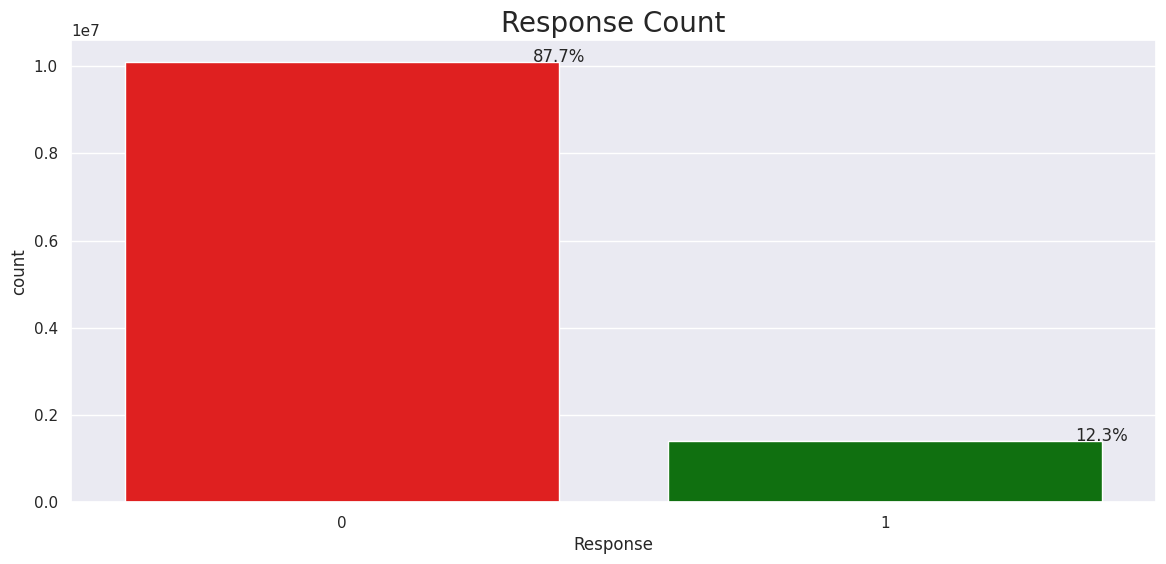

In [36]:
sns.set(style="darkgrid")
colors = ['red', 'green']
plt.figure(figsize=(14,6))
total = float(len(df))
ax = sns.countplot(x='Response', data=df, palette=colors)
plt.title('Response Count', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

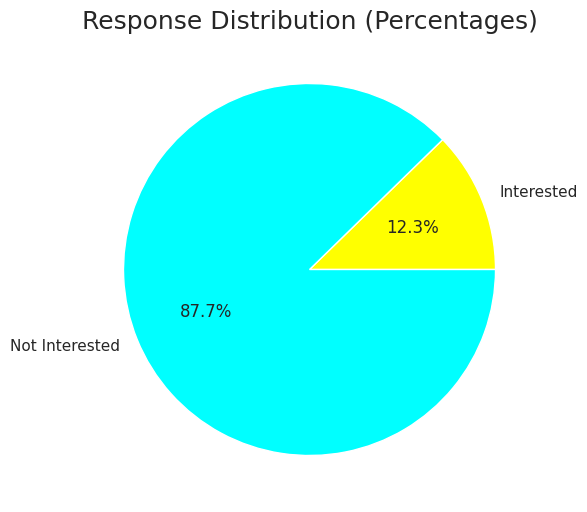

In [40]:
#using pie charts to visualize the percenatage of the responses

positive_percent = len(df[df['Response'] == 1]) / len(df) * 100
negative_percent = len(df[df['Response'] == 0]) / len(df) * 100
percentages = [positive_percent, negative_percent]
plt.figure(figsize=(6,8))
plt.pie(percentages, labels=['Interested', 'Not Interested'], autopct='%.1f%%', colors=['yellow', 'cyan'])
plt.title('Response Distribution (Percentages)', fontsize=18)
plt.show()

*The data is imbalanced where, 87.7% percent of people havenot shown any intrest and 12.3% people have shown interest.*

## **ANALYZING EACH VARIABLE**

# Gender

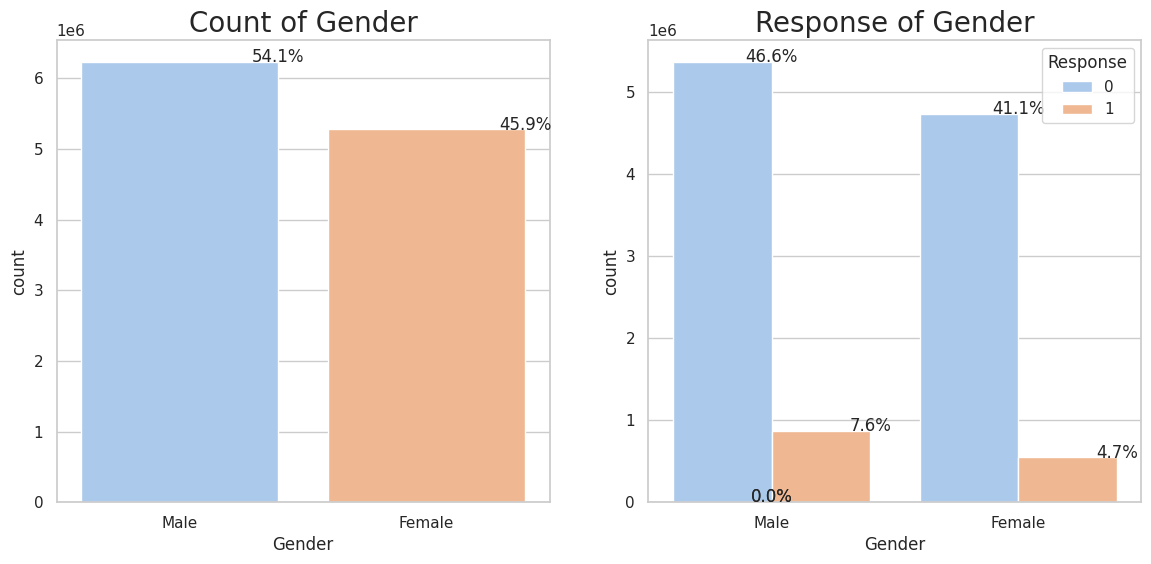

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
total = float(len(df))
ax1 = sns.countplot(x='Gender', hue='Gender', palette="pastel", data=df, legend=False)
plt.title('Count of Gender', fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center')

plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Gender', hue='Response', palette="pastel", data=df)
plt.title('Response of Gender', fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center')

plt.show()


*   The dataset is nearly evenly split between males and females, with a slight majority of males.

*   While there is a slight difference in insurance interest between genders, the overall trend is more pronounced in the low interest category.

*   The data indicates a general disinterest in vehicle insurance across both genders, with a marginally higher proportion of males expressing interest.








# Driving License

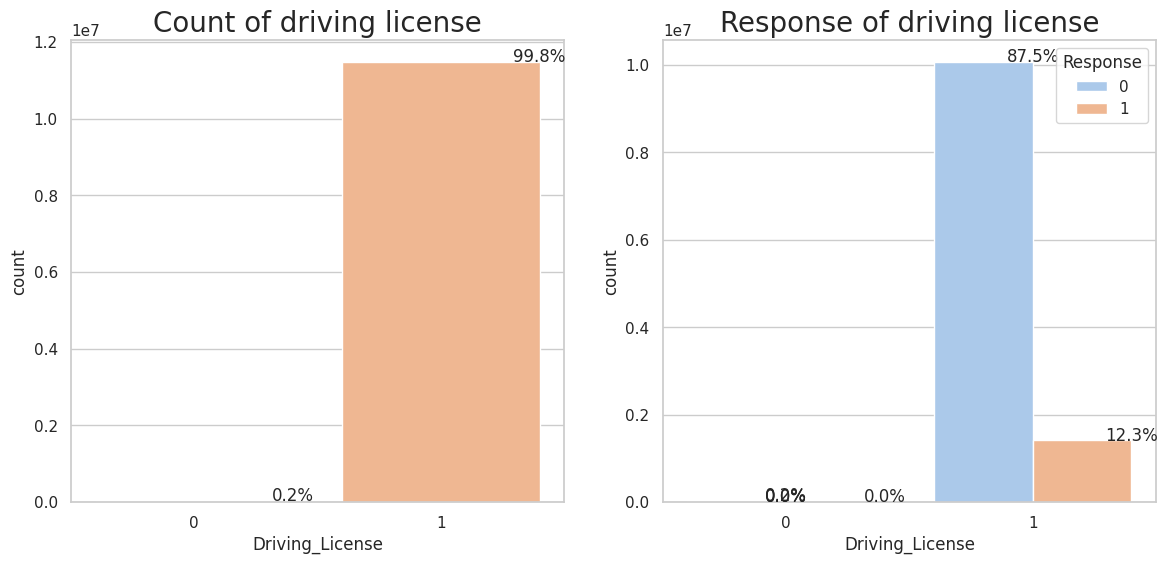

In [45]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set(style="whitegrid")
total = float(len(df))
ax1 = sns.countplot(x='Driving_License', hue='Driving_License', palette="pastel", data=df,legend=False)
plt.title('Count of driving license',fontsize=20)
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center')
plt.subplot(1,2,2)
total = float(len(df))
ax2 = sns.countplot(x='Driving_License',hue='Response',palette="pastel", data=df)
plt.title('Response of driving license',fontsize=20)
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center')
plt.show()

# Age Distribution

<Figure size 1200x500 with 0 Axes>

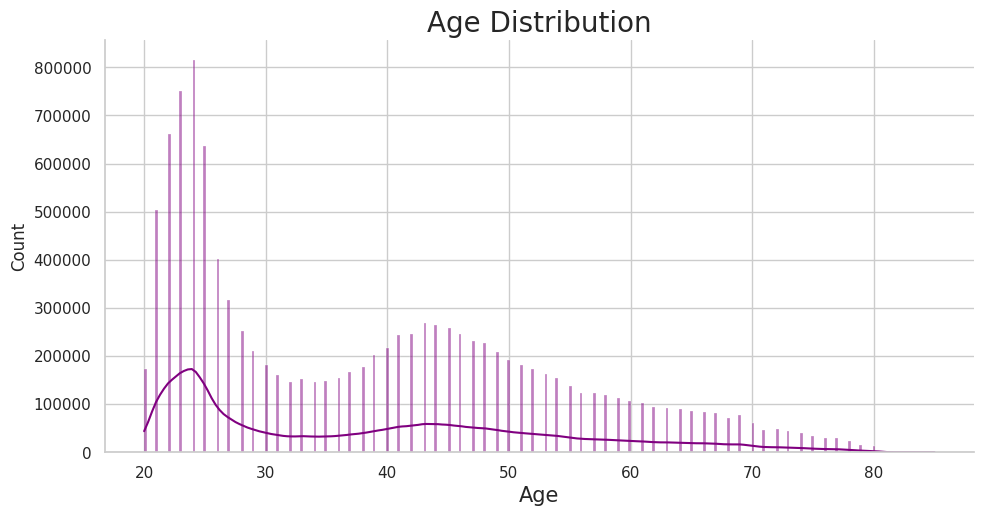

In [47]:
plt.figure(figsize=(12,5))
sns.displot(df['Age'], kde=True, color='purple', aspect=2)
plt.xlabel('Age', fontsize=15)
plt.title('Age Distribution', fontsize=20)
plt.show()

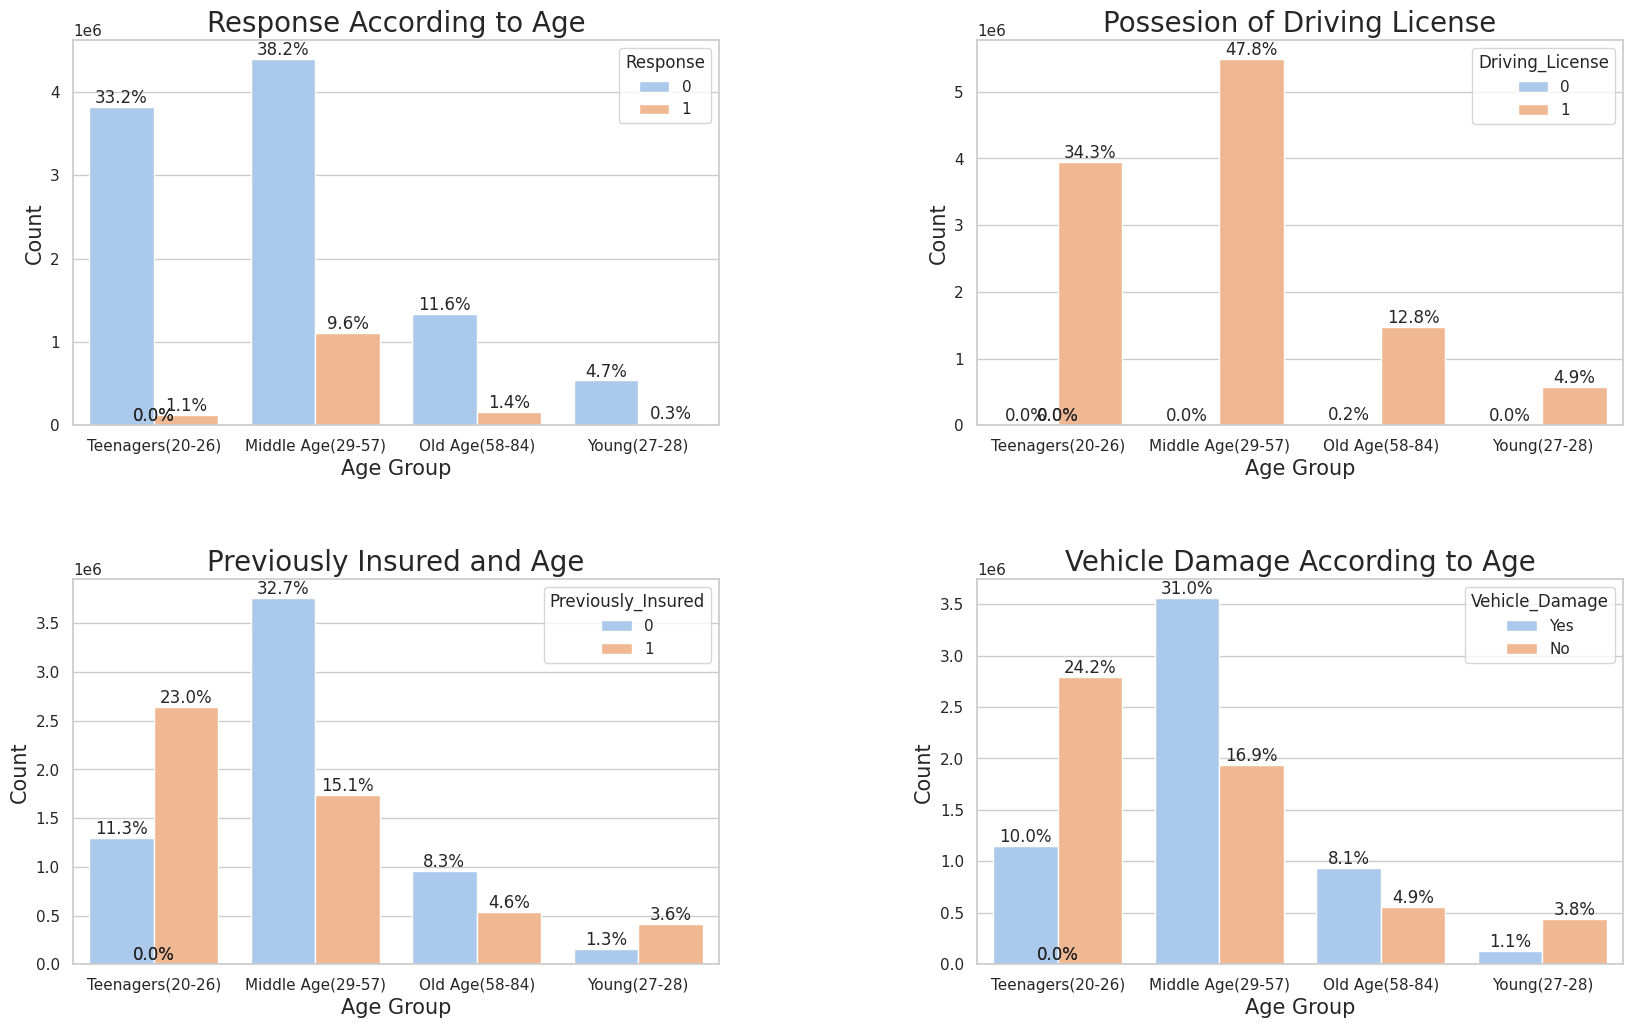

In [53]:
# Group the ages
df['Ages'] = df['Age']
df.loc[(df['Ages'] >= 20) & (df['Ages'] < 27), 'Age_label'] = 'Teenagers(20-26)'
df.loc[(df['Ages'] >= 27) & (df['Ages'] < 29), 'Age_label'] = 'Young(27-28)'
df.loc[(df['Ages'] >= 29) & (df['Ages'] < 58), 'Age_label'] = 'Middle Age(29-57)'
df.loc[(df['Ages'] >= 58) & (df['Ages'] <= 85), 'Age_label'] = 'Old Age(58-84)'

# Convert to categorical values
df.loc[(df['Ages'] >= 20) & (df['Ages'] < 27), 'Ages'] = 0
df.loc[(df['Ages'] >= 27) & (df['Ages'] < 29), 'Ages'] = 1
df.loc[(df['Ages'] >= 29) & (df['Ages'] < 58), 'Ages'] = 2
df.loc[(df['Ages'] >= 58) & (df['Ages'] <= 85), 'Ages'] = 3
sns.set(style="whitegrid")
n_rows, n_cols = 2, 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

palette = sns.color_palette("pastel", n_colors=len(df['Response'].unique()))

# Plot 1: Response vs age
total = float(len(df))
sns.countplot(x='Age_label', hue='Response', palette=palette, data=df, ax=axes[0, 0])
axes[0, 0].set_title('Response According to Age', fontsize=20)
axes[0, 0].set_xlabel('Age Group', fontsize=15)
axes[0, 0].set_ylabel('Count', fontsize=15)
for p in axes[0, 0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0, 0].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Plot 2: Driving License vs age
sns.countplot(x='Age_label', hue='Driving_License', palette=palette, data=df, ax=axes[0, 1])
axes[0, 1].set_title('Possesion of Driving License', fontsize=20)
axes[0, 1].set_xlabel('Age Group', fontsize=15)
axes[0, 1].set_ylabel('Count', fontsize=15)
for p in axes[0, 1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0, 1].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Plot 3: Previously Insured vs age
sns.countplot(x='Age_label', hue='Previously_Insured', palette=palette, data=df, ax=axes[1, 0])
axes[1, 0].set_title('Previously Insured and Age', fontsize=20)
axes[1, 0].set_xlabel('Age Group', fontsize=15)
axes[1, 0].set_ylabel('Count', fontsize=15)
for p in axes[1, 0].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[1, 0].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Plot 4: Vehicle Damage according to age
sns.countplot(x='Age_label', hue='Vehicle_Damage', palette=palette, data=df, ax=axes[1, 1])
axes[1, 1].set_title('Vehicle Damage According to Age', fontsize=20)
axes[1, 1].set_xlabel('Age Group', fontsize=15)
axes[1, 1].set_ylabel('Count', fontsize=15)
for p in axes[1, 1].patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[1, 1].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
plt.show()

# Previously Insured

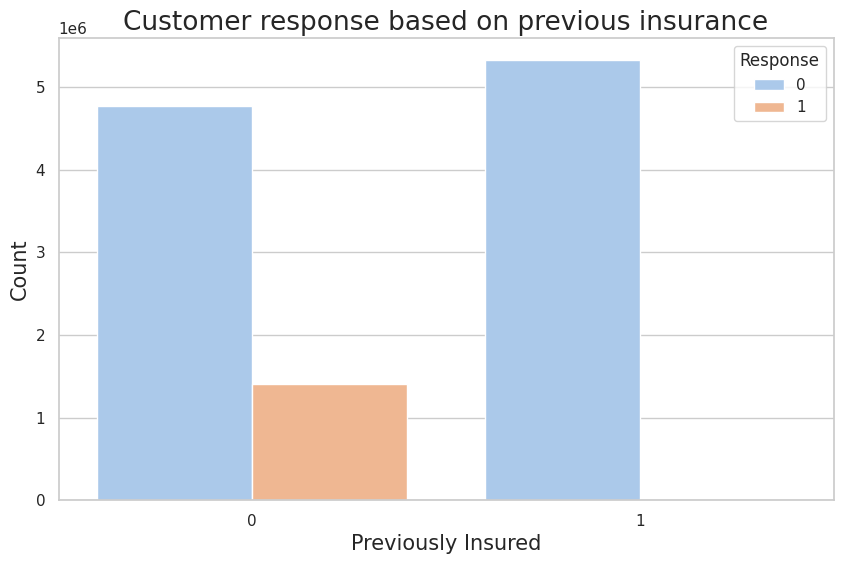

In [55]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df, x = 'Previously_Insured', hue = 'Response', palette='pastel')
plt.xlabel('Previously Insured', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Customer response based on previous insurance', fontsize = 19)
plt.show()

# Vehicle Age

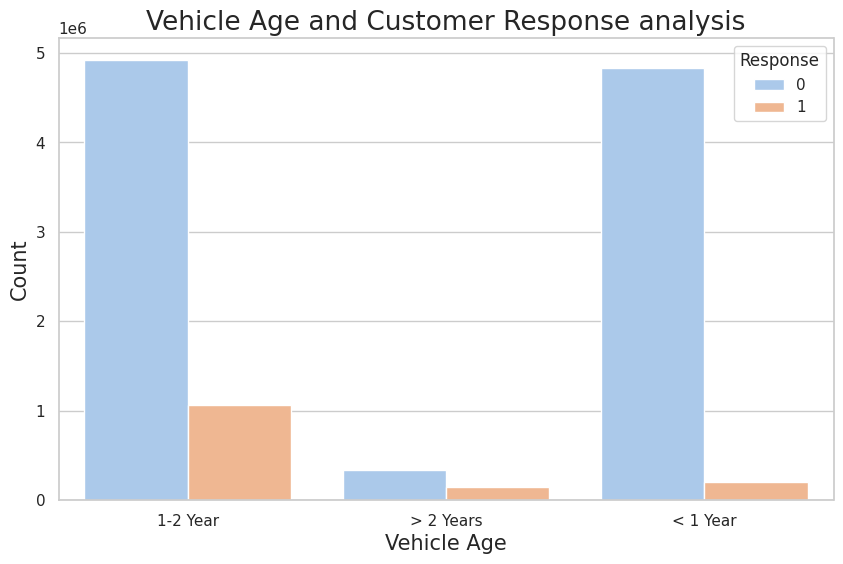

In [56]:
plt.figure(figsize = (10,6) )
sns.countplot(data = df, x = 'Vehicle_Age', hue = 'Response', palette='pastel')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

# Annual Premium

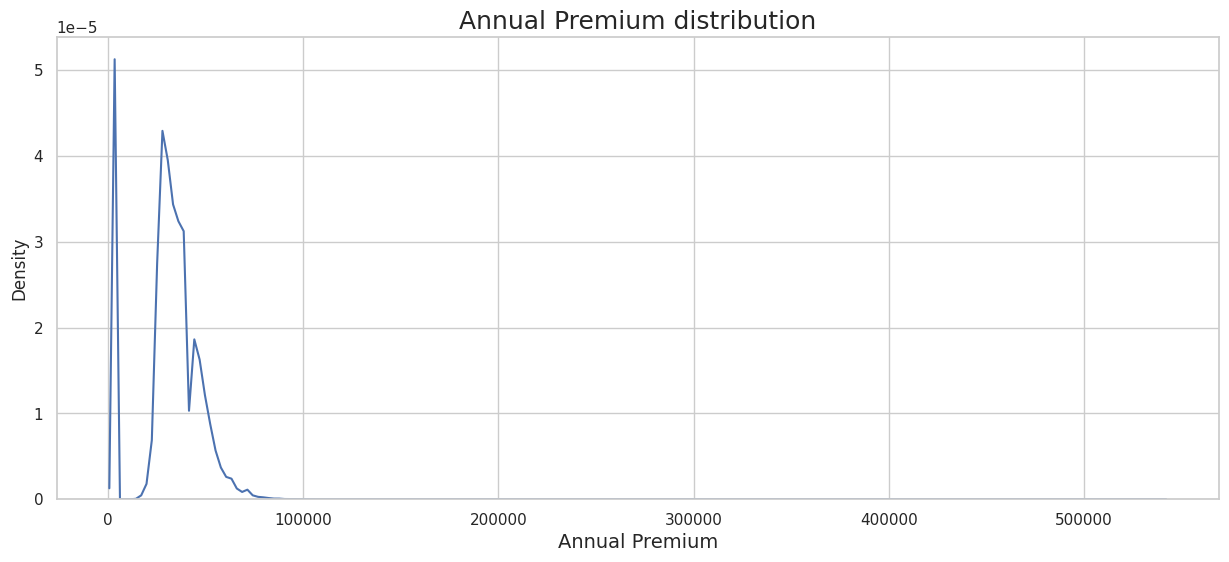

In [57]:
plt.figure(figsize=(15,6))
sns.kdeplot(df['Annual_Premium'])
plt.xlabel('Annual Premium', fontsize = 14)
plt.title('Annual Premium distribution', fontsize = 18)
plt.show()

# Policy Sales Channel

<Figure size 1200x500 with 0 Axes>

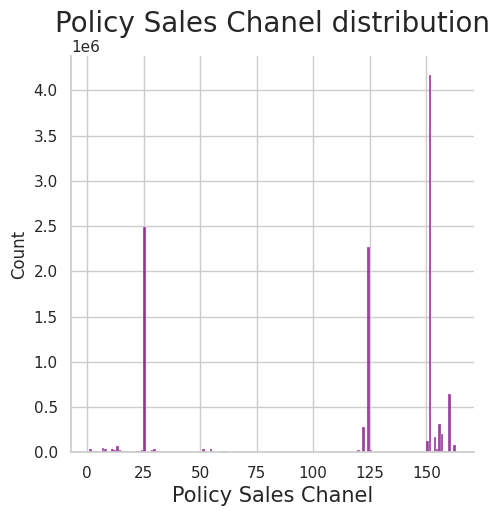

In [61]:
plt.figure(figsize = (12,5))
sns.displot(df['Policy_Sales_Channel'], kde = False, color = 'purple')
plt.xlabel('Policy Sales Chanel', fontsize = 15)
plt.title('Policy Sales Chanel distribution', fontsize = 20)
plt.show()

# Vintage

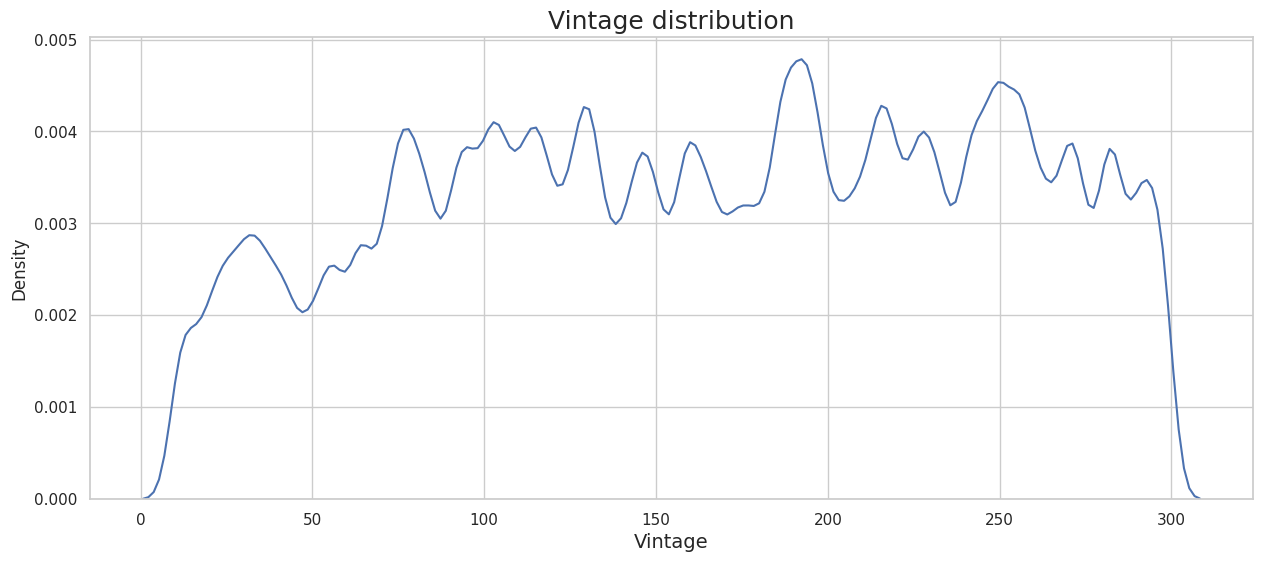

In [62]:
plt.figure(figsize=(15,6))
sns.kdeplot(df['Vintage'])
plt.xlabel('Vintage', fontsize = 14)
plt.title('Vintage distribution', fontsize = 18)
plt.show()